TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

(0.0, 400.0)

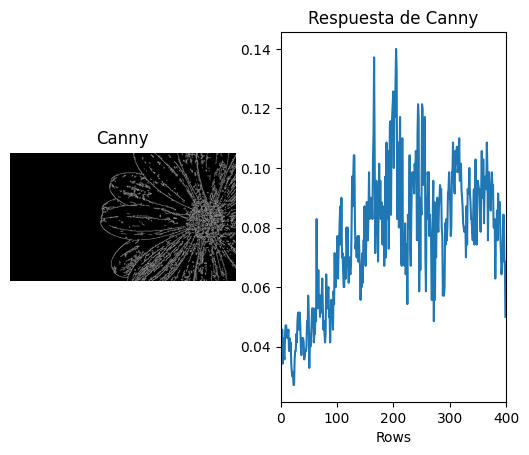

In [28]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#Lee imagen de archivo
img = cv2.imread('C:\\Users\\anixi\\anaconda3\\envs\\img_prova_VC.jpg') 

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

rows = row_counts[:,0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Rows")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [29]:
import cv2
import numpy as np

# Inizializza la cattura video dalla webcam
vid = cv2.VideoCapture(0)

# Inizializza il sottrattore di fondo
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
myBg = cv2.imread('C:\\Users\\anixi\\anaconda3\\envs\\img_prova_VC.jpg')

if myBg is None:
    print("Error: error loading image")
    vid.release()
    cv2.destroyAllWindows()

while True:
    
    ret, frame = vid.read()

    if not ret:
        break

    #Eliminazione sfondo
    framem = cv2.flip(frame, 1) #capovolge immagine a specchio
    objetos = eliminadorFondo.apply(framem) 
    
    #creo una maschera 
    _, mask = cv2.threshold(objetos, 190, 255, cv2.THRESH_BINARY)
    maskRev = cv2.bitwise_not(mask) #immagine invertita

    #ridimensionamento immagine
    myBg = cv2.resize(myBg, (frame.shape[1], frame.shape[0]))

    #estraggo gli oggetti in primo piano
    foregr = cv2.bitwise_and(framem, framem, mask=mask)

    #estraggo lo sfondo
    backgr = cv2.bitwise_and(myBg, myBg, mask=maskRev)

    result = cv2.add(foregr, backgr)


    # rilevazione dei bordi

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    edges = cv2.Canny(gray_frame, 50, 100)  # Rilevazione dei bordi

    _, mask2 = cv2.threshold(edges, 1, 255, cv2.THRESH_BINARY)
    maskRev2 = cv2.bitwise_not(mask2)
    foregr2 = cv2.bitwise_and(frame, frame, mask=mask2)
    backgr2 = cv2.bitwise_and(myBg, myBg, mask=maskRev2)
    result2 = cv2.add(foregr2, backgr2)

    
    cv2.imshow('Cámara web original', frame)  
    cv2.imshow('Eliminador fondo', objetos)  
    cv2.imshow('Fondo personalizado', result)
    cv2.imshow('Bordes', edges)  
    cv2.imshow('Canny con fondo personalizado', result2)

    # Esci con il tasto ESC
    if cv2.waitKey(20) == 27:
        break

# Libero l'oggetto di cattura
vid.release()
# Distruggo tutte le finestre
cv2.destroyAllWindows()